In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 

In [4]:
df = pd.read_csv("C:\\Users\\hp\\OneDrive\\Documents\\naresh IT\\EDA with python\\ALL DATA FILES\\Visadataset.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [12]:
print(f"dataset info {df.info()}")
print("---------------------------")
print(f"dataset dtypes {df.dtypes}")
print("---------------------------")
print(f"dataset shape {df.shape}")
print("---------------------------")
print(f"dataset size {df.size}")
print("---------------------------")
print(f"dataset {df.columns}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB
dataset info None
---------------------------
dataset dtypes case_id                   object
contine

#  Convert categorical columns Numerical columns names separately

In [14]:
cat_cols =df.select_dtypes(include="object").columns

In [15]:
cat_cols.unique()

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [16]:
cat_cols.nunique()

9

In [19]:
cat_cols.value_counts()

case_id                  1
continent                1
education_of_employee    1
has_job_experience       1
requires_job_training    1
region_of_employment     1
unit_of_wage             1
full_time_position       1
case_status              1
Name: count, dtype: int64

In [30]:
cdf = df['continent'].value_counts()

keys=cdf.keys()
index=cdf.index

values =cdf.values


**Bar-chart**

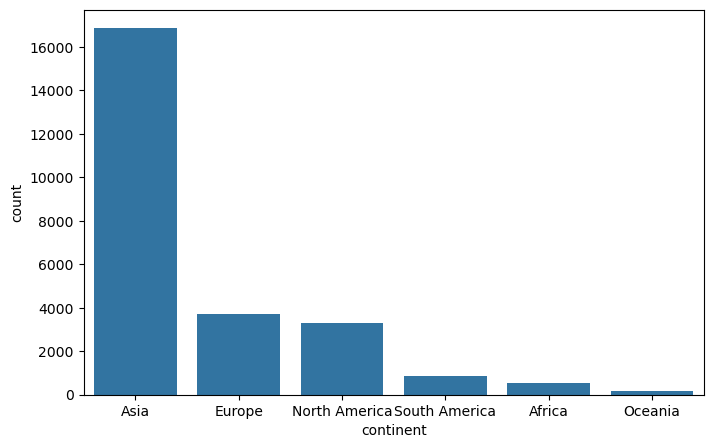

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='continent',order=keys)
plt.show()


**relative Frequency**

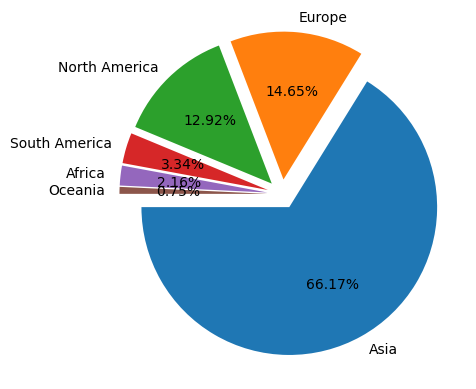

In [32]:
plt.pie(values,
        explode=[0.1,0.1,0.1,0.1,0.1,0.1],
       labels=keys,autopct="%0.2f%%",
       startangle=180,radius=1)
plt.show()

In [34]:
num_cols = df.select_dtypes(exclude='object').columns
print(num_cols)

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')


In [39]:
len(num_cols.value_counts())

3

In [44]:
wage_count=round(len(df['prevailing_wage']),2)
wage_min=round(df['prevailing_wage'].min(),2)
wage_max=round(df['prevailing_wage'].max(),2)
wage_mean=round(df['prevailing_wage'].mean(),2)
wage_median=round(df['prevailing_wage'].median(),2)
wage_std=round(df['prevailing_wage'].std(),2)
list_values=[wage_count,wage_min,wage_max,
wage_mean,wage_median,wage_std]
index_val=['count','min','max','mean','median','std']
pd.DataFrame(list_values,
columns=['prevailing_wage'],
index=index_val)

,prevailing_wage
count,25480.00
min,2.14
max,319210.27
mean,74455.81
median,70308.21
std,52815.94


In [45]:
print("precentile-data")
wage_25p=round(np.percentile(df['prevailing_wage'],25),2)
wage_50p=round(np.percentile(df['prevailing_wage'],50),2)
wage_75p=round(np.percentile(df['prevailing_wage'],75),2)
print(f"the 25% data is {wage_25p}")
print(f"the 50% data is {wage_50p}")
print(f"the 75% data is {wage_75p}")

print("****************************")

print("quantile-data")

wage_25q=round(np.quantile(df['prevailing_wage'],0.25),2)
wage_50q=round(np.quantile(df['prevailing_wage'],0.50),2)
wage_75q=round(np.quantile(df['prevailing_wage'],0.75),2)

print(f"the 25% data is {wage_25q}")
print(f"the 50% data is {wage_50q}")
print(f"the 75% data is {wage_75q}")



precentile-data
the 25% data is 34015.48
the 50% data is 70308.21
the 75% data is 107735.51
****************************
quantile-data
the 25% data is 34015.48
the 50% data is 70308.21
the 75% data is 107735.51


**Emperical-rule(68-95-99.7)**

In [51]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


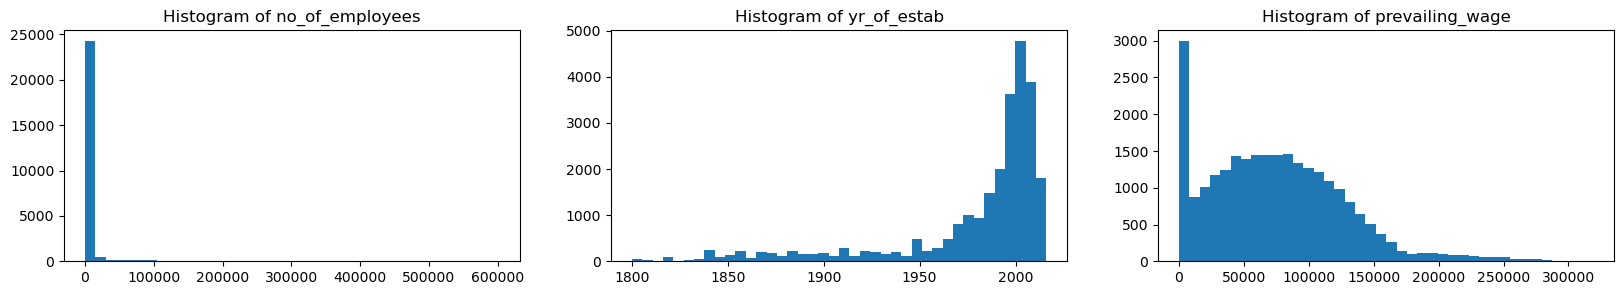

In [54]:
plt.figure(figsize=(20,3))
for i in range(len(cols)):
    plt.subplot(1,len(cols),i+1)
    plt.hist(df[cols[i]],bins=40)
    plt.title(f"Histogram of {cols[i]}")
    

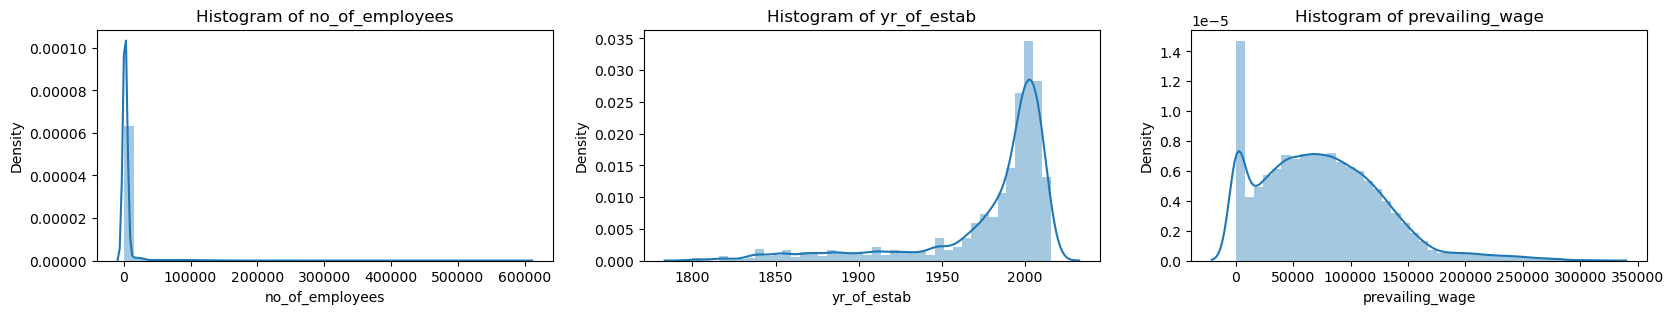

In [55]:
import warnings 
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,3))
for i in range(len(cols)):
    plt.subplot(1,len(cols),i+1)
    sns.distplot(df[cols[i]],bins=40)
    plt.title(f"Histogram of {cols[i]}")

**Outlier**

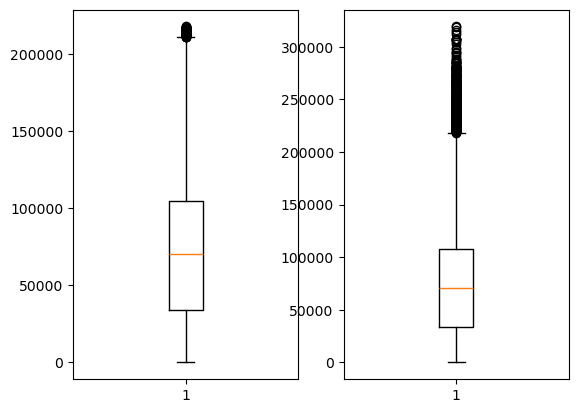

In [59]:
l1= []
median = df['prevailing_wage'].median()

Q1 = np.percentile(df['prevailing_wage'], 25)
Q3 = np.percentile(df['prevailing_wage'], 75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR


for value in df['prevailing_wage'].values:
    if value  < LB or value > UB:
        l1.append(median)
    else:
        l1.append(value)
        
visa_df_copy = df.copy()
visa_df_copy['prevailing_wage'] = l1
plt.subplot(1,2,1).boxplot(visa_df_copy['prevailing_wage'])
plt.subplot(1,2,2).boxplot(df['prevailing_wage'])
plt.show()

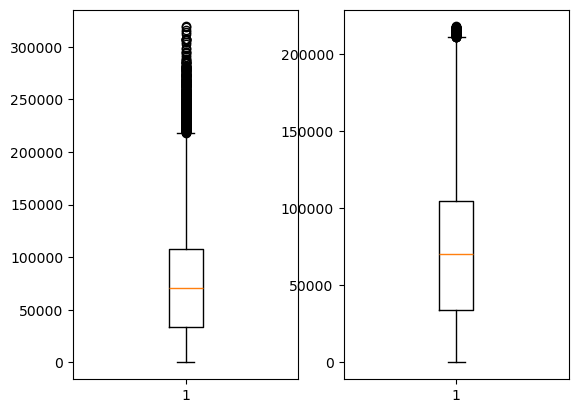

In [61]:
con1=df['prevailing_wage']<LB
con2=df['prevailing_wage']>UB
con=con1 | con2

median=df['prevailing_wage'].median()

new_data=np.where(con,
                  median,
                  df['prevailing_wage'])

visa_df_copy = df.copy()
visa_df_copy['prevailing_wage'] = new_data
plt.subplot(1,2,1).boxplot(df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df_copy['prevailing_wage'])
plt.show()

In [62]:
col1=df['continent']
col2=df['case_status']
result1=pd.crosstab(col1,col2)
result1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [63]:
col1=df['continent']
col2=df['case_status']
result2=pd.crosstab(col2,col1)
result2

continent,Africa,Asia,Europe,North America,Oceania,South America
case_status,,,,,,
Certified,397,11012,2957,2037,122,493
Denied,154,5849,775,1255,70,359


<Axes: xlabel='continent'>

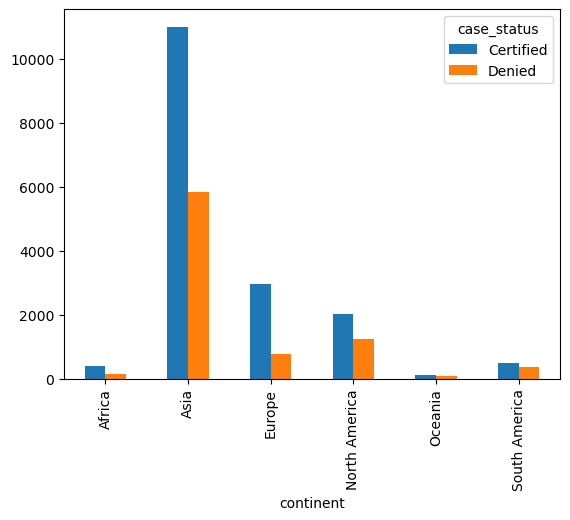

In [64]:
result1.plot(kind='bar')

<Axes: xlabel='case_status'>

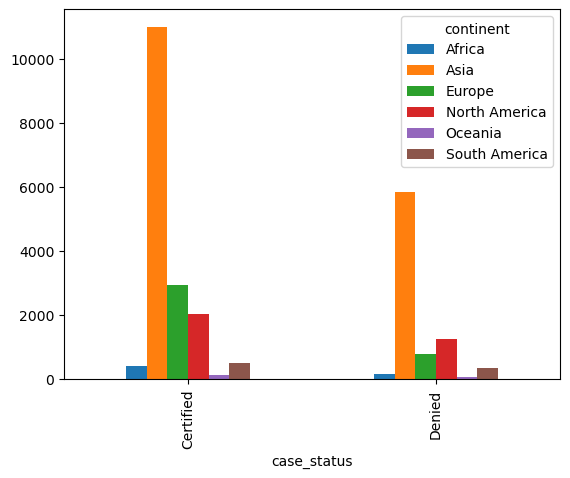

In [65]:
result2.plot(kind='bar')

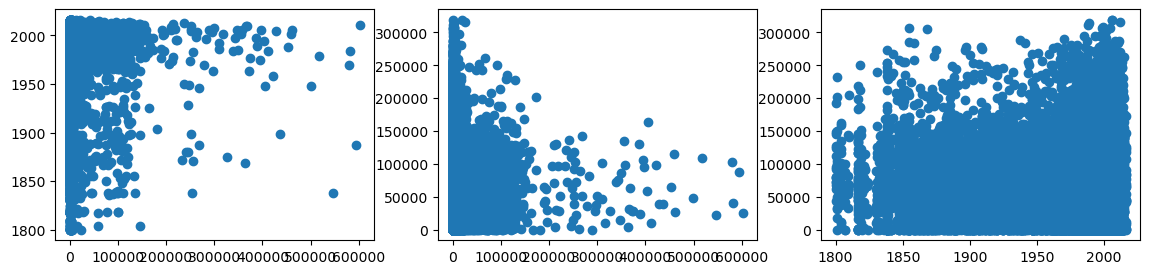

In [66]:
plt.figure(figsize=(14,3))

col1=df['no_of_employees']
col2=df['yr_of_estab']
plt.subplot(1,3,1).scatter(col1,col2)


col1=df['no_of_employees']
col2=df['prevailing_wage']
plt.subplot(1,3,2).scatter(col1,col2)

col1=df['yr_of_estab']
col2=df['prevailing_wage']
plt.subplot(1,3,3).scatter(col1,col2)

In [70]:
heat_map=df.corr(numeric_only=True)

<Axes: >

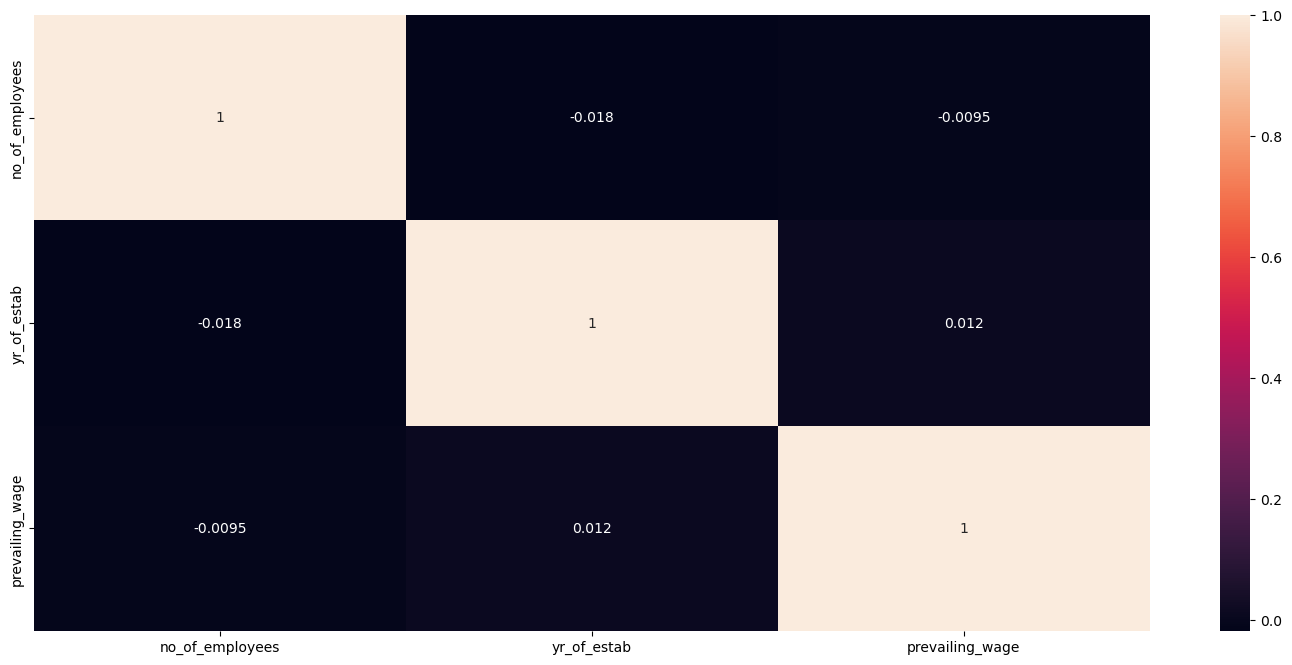

In [71]:
plt.figure(figsize=(18,8))
sns.heatmap(heat_map,annot=True)

In [73]:
mean = df['prevailing_wage'].mean()
std = df['prevailing_wage'].std()
Nr= df['prevailing_wage'] - mean
df['prevailing_wage_z'] =Nr/std
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_z
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398510
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169832
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919060
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169991
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428576
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049923
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876083
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360253
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221504


In [74]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df['prevailing_wage_ss']=ss.fit_transform(df[['prevailing_wage']])

In [75]:
df[['prevailing_wage','prevailing_wage_z','prevailing_wage_ss']]

,prevailing_wage,prevailing_wage_z,prevailing_wage_ss
0,592.2029,-1.398510,-1.398537
1,83425.6500,0.169832,0.169835
2,122996.8600,0.919060,0.919079
3,83434.0300,0.169991,0.169994
4,149907.3900,1.428576,1.428604
...,...,...,...
25475,77092.5700,0.049923,0.049924
25476,279174.7900,3.876083,3.876159
25477,146298.8500,1.360253,1.360280
25478,86154.7700,0.221504,0.221509


In [77]:
x_max = df['prevailing_wage'].max()
x_min = df['prevailing_wage'].min()
Nr = df['prevailing_wage'] - x_min
df['prevailing_wage_min_max'] = Nr/(x_max - x_min)
df[['prevailing_wage', 'prevailing_wage_min_max']]

,prevailing_wage,prevailing_wage_min_max
0,592.2029,0.001849
1,83425.6500,0.261345
2,122996.8600,0.385312
3,83434.0300,0.261371
4,149907.3900,0.469616
...,...,...
25475,77092.5700,0.241505
25476,279174.7900,0.874579
25477,146298.8500,0.458311
25478,86154.7700,0.269895


In [78]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df['prevailing_wage_min_max_ss'] = mms.fit_transform(df[['prevailing_wage']])

df[['prevailing_wage','prevailing_wage_min_max','prevailing_wage_min_max_ss']]

,prevailing_wage,prevailing_wage_min_max,prevailing_wage_min_max_ss
0,592.2029,0.001849,0.001849
1,83425.6500,0.261345,0.261345
2,122996.8600,0.385312,0.385312
3,83434.0300,0.261371,0.261371
4,149907.3900,0.469616,0.469616
...,...,...,...
25475,77092.5700,0.241505,0.241505
25476,279174.7900,0.874579,0.874579
25477,146298.8500,0.458311,0.458311
25478,86154.7700,0.269895,0.269895


In [79]:
visa_df=pd.read_csv(r"C:\\Users\\hp\\OneDrive\\Documents\\naresh IT\\EDA with python\\ALL DATA FILES\\Visadataset.csv")
cols=visa_df.select_dtypes(include='object').columns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cols:
    visa_df[i]=le.fit_transform(visa_df[i])

visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,0,1,2,0,0,14513,2007,4,592.2029,0,1,1
1,1,1,3,1,0,2412,2002,2,83425.6500,3,1,0
2,2,1,0,0,1,44444,2008,4,122996.8600,3,1,1
3,3,1,0,0,0,98,1897,4,83434.0300,3,1,1
4,4,0,3,1,0,1082,2005,3,149907.3900,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,17204,1,0,1,1,2601,2008,3,77092.5700,3,1,0
25476,17205,1,2,1,0,3274,2006,2,279174.7900,3,1,0
25477,17206,1,3,1,0,1121,1910,3,146298.8500,3,0,0
25478,17207,1,3,1,1,1918,1887,4,86154.7700,3,1,0


In [81]:
exp_data = np.array(visa_df)
print(exp_data)

[[0.0000e+00 1.0000e+00 2.0000e+00 ... 0.0000e+00 1.0000e+00 1.0000e+00]
 [1.0000e+00 1.0000e+00 3.0000e+00 ... 3.0000e+00 1.0000e+00 0.0000e+00]
 [2.0000e+00 1.0000e+00 0.0000e+00 ... 3.0000e+00 1.0000e+00 1.0000e+00]
 ...
 [1.7206e+04 1.0000e+00 3.0000e+00 ... 3.0000e+00 0.0000e+00 0.0000e+00]
 [1.7207e+04 1.0000e+00 3.0000e+00 ... 3.0000e+00 1.0000e+00 0.0000e+00]
 [1.7209e+04 1.0000e+00 0.0000e+00 ... 3.0000e+00 1.0000e+00 0.0000e+00]]


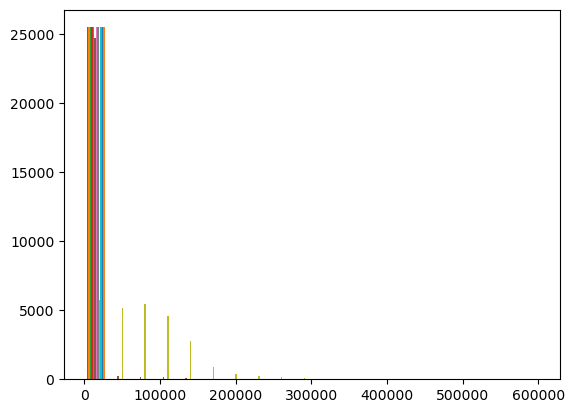

In [82]:
plt.hist(exp_data,bins=20,label='Exponential')
plt.show()

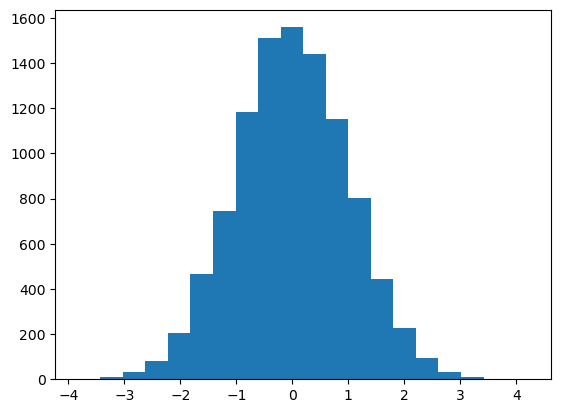

In [83]:
norm_data= np.random.normal(size=10000)
plt.hist(norm_data,bins=20,label='Exponential')
plt.show()

In [84]:
log_data=np.log(exp_data)
log_data

array([[      -inf, 0.        , 0.69314718, ...,       -inf, 0.        ,
        0.        ],
       [0.        , 0.        , 1.09861229, ..., 1.09861229, 0.        ,
              -inf],
       [0.69314718, 0.        ,       -inf, ..., 1.09861229, 0.        ,
        0.        ],
       ...,
       [9.75301344, 0.        , 1.09861229, ..., 1.09861229,       -inf,
              -inf],
       [9.75307156, 0.        , 1.09861229, ..., 1.09861229, 0.        ,
              -inf],
       [9.75318778, 0.        ,       -inf, ..., 1.09861229, 0.        ,
              -inf]])

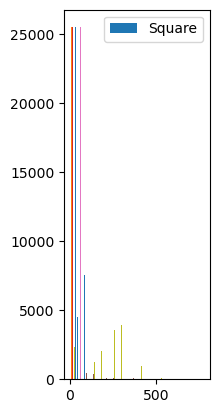

In [87]:
square_data = np.sqrt(exp_data)
plt.subplot(1,3,3).hist(square_data,bins=20,label='Square')
plt.legend()
plt.show()

(array([1.20000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        4.00000e+00, 8.00000e+00, 9.00000e+00, 0.00000e+00, 3.05727e+05]),
 array([-73.41883151, -65.84819855, -58.27756559, -50.70693264,
        -43.13629968, -35.56566673, -27.99503377, -20.42440082,
        -12.85376786,  -5.2831349 ,   2.28749805]),
 <BarContainer object of 10 artists>)

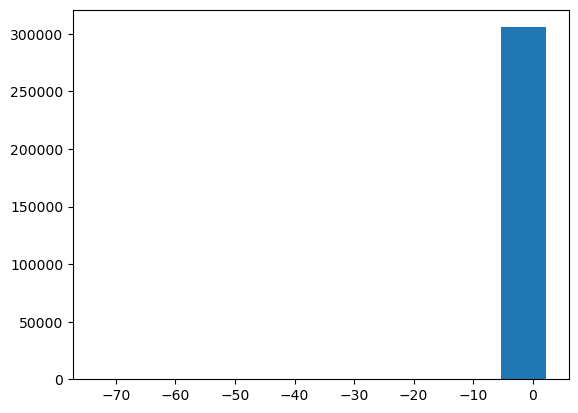

In [88]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson')
exp_data1=exp_data.reshape(-1,1)
data_trans = power.fit_transform(exp_data1)
plt.hist(data_trans)